In [2]:
import urllib.request
import urllib.parse
from urllib.parse import urlsplit, quote
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from IPython.display import Image, display
import numpy as np
from pprint import pprint

import docx
from docx.oxml.ns import qn
from docx import Document
from docx.shared import Inches, Pt, Cm, Mm, RGBColor
from docx.enum.table import WD_TABLE_ALIGNMENT

신비록 No.899 ['노말', '에스퍼']


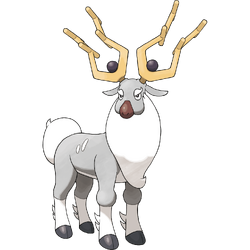

사마자르 No.900 ['벌레', '바위']


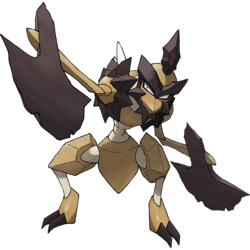

다투곰 No.901 ['땅', '노말']


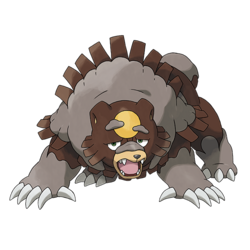

대쓰여너 No.902 ['물', '고스트']


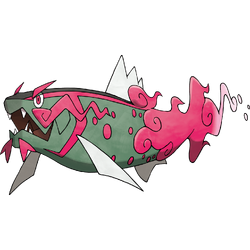

포푸니크 No.903 ['격투', '독']


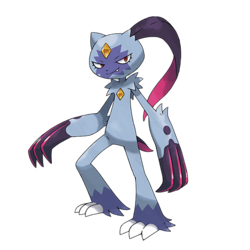

장침바루 No.904 ['악', '독']


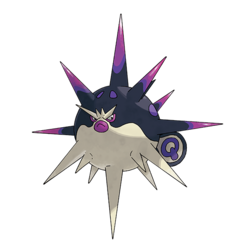

러브로스 No.905 ['페어리', '비행']


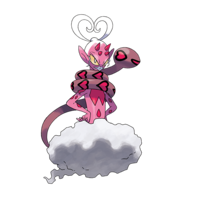

In [4]:
# url = 'https://pokemon.fandom.com/ko/wiki/흥나숭_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/나몰빼미_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/도치마론_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/비크티니_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/모부기_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/나무지기_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/치코리타_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/토게틱_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/포푸니_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/이상해씨_(포켓몬)'
# url = 'https://pokemon.fandom.com/ko/wiki/레트라_(포켓몬)'
url = 'https://pokemon.fandom.com/ko/wiki/신비록_(포켓몬)'

url_info = urlsplit(url)
encoded_url = f'{url_info.scheme}://{url_info.netloc}{quote(url_info.path)}'

document = Document()
section = document.sections[0]
section.page_height = Mm(297)
section.page_width = Mm(210)
#changing the page margins
margin = 1.27
sections = document.sections
for section in sections:
    section.top_margin = Cm(margin)
    section.bottom_margin = Cm(margin)
    section.left_margin = Cm(margin)
    section.right_margin = Cm(margin)
document.styles['Normal'].font.name = 'NanumSquareRound'
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), 'NanumSquareRound')
    
for _ in range(7):
#     print(encoded_url)
    req = Request(encoded_url, headers={'User-Agent': 'Mozilla/5.0'})
    res = urlopen(req)
    html = res.read()
    soup = BeautifulSoup(html, 'html.parser')

    name = soup.find("div", {"class": "name-ko"}).text.strip()
    number = soup.find("div", {"class": "index"}).text.strip()
    #img_url = soup.find("img", {"alt": "이미지"})['data-src']
    img_url = soup.find("div", {"class":"image rounded"}).find("img")['data-src']
#     types = [poke_type['title'].split(' ')[0] for poke_type in soup.select('tbody > tr > td > div > span > a')[:2]]
    types = [poke_type['title'].split(' ')[0] for poke_type in soup.select('tbody > tr > td > div')[0].select('span > a')]
#     types = np.unique(types)
    urllib.request.urlretrieve(img_url, f"{name}.png")
    print(name, number, types)
    display(Image(filename=f"{name}.png"))

    next_monster = soup.find("table").findAll("a")[-1]['href']
    encoded_url = "https://pokemon.fandom.com" + next_monster
    
    # Document
    table = document.add_table(rows=4, cols=1)
    table.alignment = WD_TABLE_ALIGNMENT.CENTER
    table.style = 'Table Grid'

    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = f"{number}"
    hdr_cells[0].paragraphs[0].runs[0].font.size = Pt(50)
    hdr_cells[0].paragraphs[0].alignment = docx.enum.text.WD_ALIGN_PARAGRAPH.CENTER

    hdr_cells = table.rows[1].cells
    p = hdr_cells[0].add_paragraph()
    p.alignment = docx.enum.text.WD_ALIGN_PARAGRAPH.CENTER
    r = p.add_run()
    r.add_picture(f"{name}.png", width=Cm(14.5), height=Cm(14.5))
    r.add_break(docx.enum.text.WD_BREAK.LINE)

    hdr_cells = table.rows[3].cells
    hdr_cells[0].text = f"{name}"
    hdr_cells[0].paragraphs[0].runs[0].font.size = Pt(70)
    hdr_cells[0].paragraphs[0].runs[0].font.color.rgb = RGBColor(192, 192, 192)
    hdr_cells[0].paragraphs[0].alignment = docx.enum.text.WD_ALIGN_PARAGRAPH.CENTER
    
    hdr_cells = table.rows[2].cells
    hdr_cells[0].text = f"{'+'.join(types)}"
    hdr_cells[0].paragraphs[0].runs[0].font.size = Pt(70)
    hdr_cells[0].paragraphs[0].runs[0].font.color.rgb = RGBColor(192, 192, 192)
    hdr_cells[0].paragraphs[0].alignment = docx.enum.text.WD_ALIGN_PARAGRAPH.CENTER
    
    document.add_page_break()
document.save('포켓몬8세대-히스이.docx')